In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# Individual analysis

First, import the dataframes

In [2]:
condition = pd.read_csv('cleaned_data/condition.csv')
control = pd.read_csv('cleaned_data/control.csv')

condition['date'] = pd.to_datetime(condition['date'])
control['date'] = pd.to_datetime(control['date'])

Let's take a look at the distribution of acitiviy for a conditioned patient

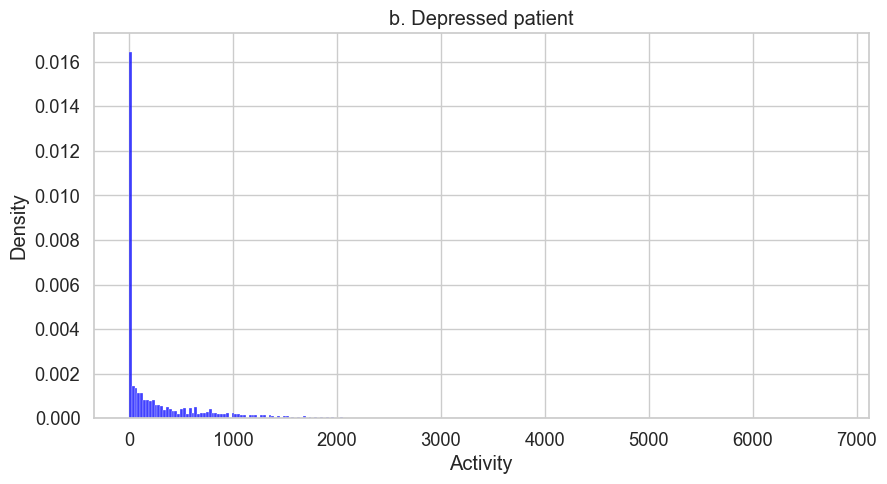

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
hist_cond = sns.histplot(data=condition, x='activity', ax=ax, color='blue', label='Condition', stat='density')
ax.set(
    xlabel='Activity',
    ylabel='Density',
    title='b. Depressed patient'
);

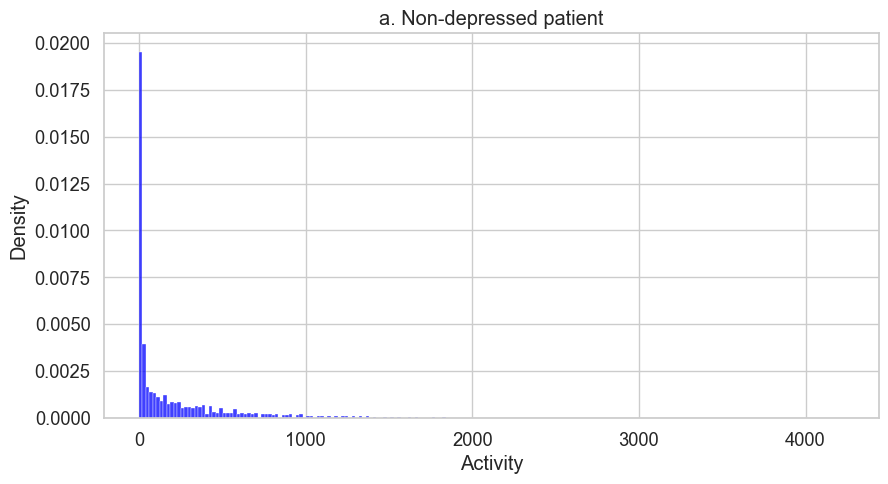

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
hist_cont = sns.histplot(data=control, x='activity', ax=ax, color='blue', label='Control', stat='density')
ax.set(
    xlabel='Activity',
    ylabel='Density',
    title='a. Non-depressed patient'
);

In [5]:
print(condition.shape)

(21556, 3)


This could be difficult to discern. Let's take a closer look. A lot of dataframe does not have teh same size, so the histogram could be vastly different from each other.

# Group by weekday

In [6]:
control['type'] = np.repeat('Control', control.shape[0])
condition['type'] = np.repeat('Condition', condition.shape[0])

df_merged = pd.concat([control, condition])
df_merged

,timestamp,date,activity,type
0,12,2006-01-30,7,Control
1,12,2006-01-30,79,Control
2,12,2006-01-30,4,Control
3,12,2006-01-30,3,Control
4,12,2006-01-30,4,Control
...,...,...,...,...
21551,11,2003-06-18,0,Condition
21552,11,2003-06-18,0,Condition
21553,11,2003-06-18,0,Condition
21554,11,2003-06-18,0,Condition


In [7]:
merged_day = df_merged.copy()
merged_day['date'] = merged_day['date'].dt.day_name()
merged_day = merged_day.groupby(['type', 'date']).mean().reset_index()
merged_day['date'] = pd.Categorical(merged_day['date'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
merged_day.head()

,type,date,timestamp,activity
0,Condition,Friday,11.5,364.390625
1,Condition,Monday,11.5,357.755208
2,Condition,Saturday,11.5,196.784375
3,Condition,Sunday,11.5,237.752778
4,Condition,Thursday,11.5,285.581250


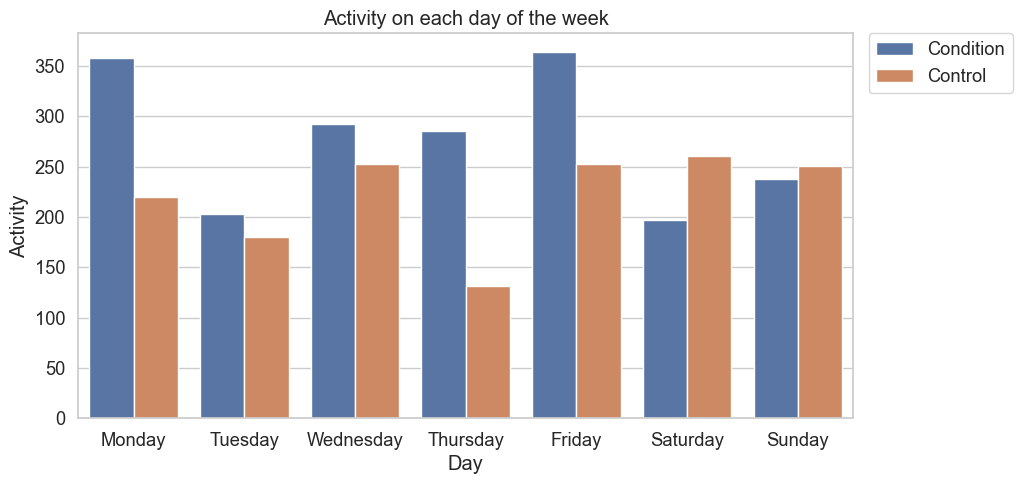

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_cond = sns.barplot(data=merged_day, x='date', y='activity', ax=ax, hue='type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(
    xlabel='Day',
    ylabel='Activity',
    title='Activity on each day of the week'
);

# Grouped by hour

Now, let's compared the activity grouped by hours instead of the day. It could give us valuable information on the time that which the patients are the most active. We can do this by splitting the time into four parts. It is right inclusive and left exclusive.

* Morning: 5 - 12
* Afternoon: 12 - 17
* Evening: 17 - 21
* Night: 21 - 4

In [ ]:
merged_hour = df_merged.copy()

merged_hour['time_of_day'] = pd.cut(merged_hour['timestamp'], bins=[-1, 5, 12, 17, 21, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], ordered=False)
merged_hour = merged_hour.groupby(['type', 'time_of_day']).mean().reset_index()
merged_hour['time_of_day'] = pd.Categorical(merged_hour['time_of_day'], categories=['Morning', 'Afternoon', 'Evening', 'Night'], ordered=True)
merged_hour

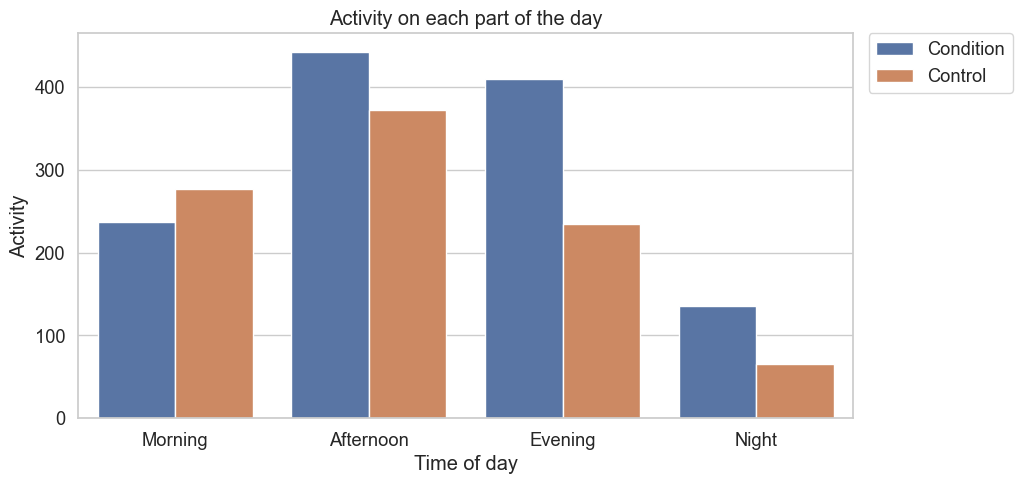

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_cond = sns.barplot(data=merged_hour, x='time_of_day', y='activity', ax=ax, hue='type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(
    xlabel='Time of day',
    ylabel='Activity',
    title='Activity on each part of the day'
);